### Problem Statement

In the telecommunication industry, customers tend to change operators if not provided with attractive schemes and offers. It is very important for any telecom operator to prevent the present customers from churning to other operators. As a data scientist, your task in this case study would be to build an ML model which can predict if the customer will churn or not in a particular month based on the past data.


In [1]:
import pandas as pd
import numpy as np

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
print("Train Data Shape: ", train_data.shape)
print("Test Data Shape: ", test_data.shape)

Train Data Shape:  (69999, 172)
Test Data Shape:  (30000, 171)


In [4]:
train_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [5]:
train_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,07-10-2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,06-12-2014,07-10-2014,8/26/2014,0,0,0,NaN,07-08-2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,N

In [6]:
#dropping columns which has no variance and dropping id column.
#'id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 
#'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_data_6',
#'date_of_last_rech_data_7', 'date_of_last_rech_data_8'

train_data.drop(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 
                 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_data_6',
'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], axis = 1, inplace=True)

test_data.drop(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 
                 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_data_6',
'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], axis = 1, inplace=True)

In [7]:
train_data['date_of_last_rech_6'].fillna('06-15-2014', inplace=True)
test_data['date_of_last_rech_6'].fillna('06-15-2014', inplace=True)

train_data['date_of_last_rech_7'].fillna('07-15-2014', inplace=True)
test_data['date_of_last_rech_7'].fillna('07-15-2014', inplace=True)

train_data['date_of_last_rech_8'].fillna('08-15-2014', inplace=True)
test_data['date_of_last_rech_8'].fillna('08-15-2014', inplace=True)

In [8]:
#print(pd.to_datetime(train_data['date_of_last_rech_6']).dt.day)

train_data['date_of_last_rech_6'] =  pd.to_datetime(train_data['date_of_last_rech_6']).dt.day
test_data['date_of_last_rech_6'] =  pd.to_datetime(test_data['date_of_last_rech_6']).dt.day

train_data['date_of_last_rech_7'] =  pd.to_datetime(train_data['date_of_last_rech_7']).dt.day
test_data['date_of_last_rech_7'] =  pd.to_datetime(test_data['date_of_last_rech_7']).dt.day

train_data['date_of_last_rech_8'] =  pd.to_datetime(train_data['date_of_last_rech_8']).dt.day
test_data['date_of_last_rech_8'] =  pd.to_datetime(test_data['date_of_last_rech_8']).dt.day


In [9]:
test_data.isnull().sum()

id                         0
arpu_6                     0
arpu_7                     0
arpu_8                     0
onnet_mou_6             1169
onnet_mou_7             1172
onnet_mou_8             1675
offnet_mou_6            1169
offnet_mou_7            1172
offnet_mou_8            1675
roam_ic_mou_6           1169
roam_ic_mou_7           1172
roam_ic_mou_8           1675
roam_og_mou_6           1169
roam_og_mou_7           1172
roam_og_mou_8           1675
loc_og_t2t_mou_6        1169
loc_og_t2t_mou_7        1172
loc_og_t2t_mou_8        1675
loc_og_t2m_mou_6        1169
loc_og_t2m_mou_7        1172
loc_og_t2m_mou_8        1675
loc_og_t2f_mou_6        1169
loc_og_t2f_mou_7        1172
loc_og_t2f_mou_8        1675
loc_og_t2c_mou_6        1169
loc_og_t2c_mou_7        1172
loc_og_t2c_mou_8        1675
loc_og_mou_6            1169
loc_og_mou_7            1172
loc_og_mou_8            1675
std_og_t2t_mou_6        1169
std_og_t2t_mou_7        1172
std_og_t2t_mou_8        1675
std_og_t2m_mou

In [10]:
train_data.isnull().sum()

arpu_6                     0
arpu_7                     0
arpu_8                     0
onnet_mou_6             2768
onnet_mou_7             2687
onnet_mou_8             3703
offnet_mou_6            2768
offnet_mou_7            2687
offnet_mou_8            3703
roam_ic_mou_6           2768
roam_ic_mou_7           2687
roam_ic_mou_8           3703
roam_og_mou_6           2768
roam_og_mou_7           2687
roam_og_mou_8           3703
loc_og_t2t_mou_6        2768
loc_og_t2t_mou_7        2687
loc_og_t2t_mou_8        3703
loc_og_t2m_mou_6        2768
loc_og_t2m_mou_7        2687
loc_og_t2m_mou_8        3703
loc_og_t2f_mou_6        2768
loc_og_t2f_mou_7        2687
loc_og_t2f_mou_8        3703
loc_og_t2c_mou_6        2768
loc_og_t2c_mou_7        2687
loc_og_t2c_mou_8        3703
loc_og_mou_6            2768
loc_og_mou_7            2687
loc_og_mou_8            3703
std_og_t2t_mou_6        2768
std_og_t2t_mou_7        2687
std_og_t2t_mou_8        3703
std_og_t2m_mou_6        2768
std_og_t2m_mou

In [11]:
#impute missing values

train_data['total_rech_data_6'].fillna(0, inplace=True)
train_data['total_rech_data_7'].fillna(0, inplace=True)
train_data['total_rech_data_8'].fillna(0, inplace=True)
train_data['max_rech_data_6'].fillna(0, inplace=True)
train_data['max_rech_data_7'].fillna(0, inplace=True)
train_data['max_rech_data_8'].fillna(0, inplace=True)

train_data['count_rech_2g_6'].fillna(0, inplace=True)
train_data['count_rech_2g_7'].fillna(0, inplace=True)
train_data['count_rech_2g_8'].fillna(0, inplace=True)

train_data['count_rech_3g_6'].fillna(0, inplace=True)
train_data['count_rech_3g_7'].fillna(0, inplace=True)
train_data['count_rech_3g_8'].fillna(0, inplace=True)

train_data['av_rech_amt_data_6'].fillna(0, inplace=True)
train_data['av_rech_amt_data_7'].fillna(0, inplace=True)
train_data['av_rech_amt_data_8'].fillna(0, inplace=True)

train_data['arpu_3g_6'].fillna(0, inplace=True)
train_data['arpu_3g_7'].fillna(0, inplace=True)
train_data['arpu_3g_8'].fillna(0, inplace=True)

train_data['arpu_2g_6'].fillna(0, inplace=True)
train_data['arpu_2g_7'].fillna(0, inplace=True)
train_data['arpu_2g_8'].fillna(0, inplace=True)

train_data['night_pck_user_6'].fillna(0, inplace=True)
train_data['night_pck_user_7'].fillna(0, inplace=True)
train_data['night_pck_user_8'].fillna(0, inplace=True)

train_data['fb_user_6'].fillna(0, inplace=True)
train_data['fb_user_7'].fillna(0, inplace=True)
train_data['fb_user_8'].fillna(0, inplace=True)

In [12]:
#impute missing values
test_data['total_rech_data_6'].fillna(0, inplace=True)
test_data['total_rech_data_7'].fillna(0, inplace=True)
test_data['total_rech_data_8'].fillna(0, inplace=True)
test_data['max_rech_data_6'].fillna(0, inplace=True)
test_data['max_rech_data_7'].fillna(0, inplace=True)
test_data['max_rech_data_8'].fillna(0, inplace=True)

test_data['count_rech_2g_6'].fillna(0, inplace=True)
test_data['count_rech_2g_7'].fillna(0, inplace=True)
test_data['count_rech_2g_8'].fillna(0, inplace=True)

test_data['count_rech_3g_6'].fillna(0, inplace=True)
test_data['count_rech_3g_7'].fillna(0, inplace=True)
test_data['count_rech_3g_8'].fillna(0, inplace=True)

test_data['av_rech_amt_data_6'].fillna(0, inplace=True)
test_data['av_rech_amt_data_7'].fillna(0, inplace=True)
test_data['av_rech_amt_data_8'].fillna(0, inplace=True)

test_data['arpu_3g_6'].fillna(0, inplace=True)
test_data['arpu_3g_7'].fillna(0, inplace=True)
test_data['arpu_3g_8'].fillna(0, inplace=True)

test_data['arpu_2g_6'].fillna(0, inplace=True)
test_data['arpu_2g_7'].fillna(0, inplace=True)
test_data['arpu_2g_8'].fillna(0, inplace=True)

test_data['night_pck_user_6'].fillna(0, inplace=True)
test_data['night_pck_user_7'].fillna(0, inplace=True)
test_data['night_pck_user_8'].fillna(0, inplace=True)

test_data['fb_user_6'].fillna(0, inplace=True)
test_data['fb_user_7'].fillna(0, inplace=True)
test_data['fb_user_8'].fillna(0, inplace=True)

In [13]:
train_data.isnull().sum()

arpu_6                    0
arpu_7                    0
arpu_8                    0
onnet_mou_6            2768
onnet_mou_7            2687
onnet_mou_8            3703
offnet_mou_6           2768
offnet_mou_7           2687
offnet_mou_8           3703
roam_ic_mou_6          2768
roam_ic_mou_7          2687
roam_ic_mou_8          3703
roam_og_mou_6          2768
roam_og_mou_7          2687
roam_og_mou_8          3703
loc_og_t2t_mou_6       2768
loc_og_t2t_mou_7       2687
loc_og_t2t_mou_8       3703
loc_og_t2m_mou_6       2768
loc_og_t2m_mou_7       2687
loc_og_t2m_mou_8       3703
loc_og_t2f_mou_6       2768
loc_og_t2f_mou_7       2687
loc_og_t2f_mou_8       3703
loc_og_t2c_mou_6       2768
loc_og_t2c_mou_7       2687
loc_og_t2c_mou_8       3703
loc_og_mou_6           2768
loc_og_mou_7           2687
loc_og_mou_8           3703
std_og_t2t_mou_6       2768
std_og_t2t_mou_7       2687
std_og_t2t_mou_8       3703
std_og_t2m_mou_6       2768
std_og_t2m_mou_7       2687
std_og_t2m_mou_8    

In [14]:
test_data.isnull().sum()

id                        0
arpu_6                    0
arpu_7                    0
arpu_8                    0
onnet_mou_6            1169
onnet_mou_7            1172
onnet_mou_8            1675
offnet_mou_6           1169
offnet_mou_7           1172
offnet_mou_8           1675
roam_ic_mou_6          1169
roam_ic_mou_7          1172
roam_ic_mou_8          1675
roam_og_mou_6          1169
roam_og_mou_7          1172
roam_og_mou_8          1675
loc_og_t2t_mou_6       1169
loc_og_t2t_mou_7       1172
loc_og_t2t_mou_8       1675
loc_og_t2m_mou_6       1169
loc_og_t2m_mou_7       1172
loc_og_t2m_mou_8       1675
loc_og_t2f_mou_6       1169
loc_og_t2f_mou_7       1172
loc_og_t2f_mou_8       1675
loc_og_t2c_mou_6       1169
loc_og_t2c_mou_7       1172
loc_og_t2c_mou_8       1675
loc_og_mou_6           1169
loc_og_mou_7           1172
loc_og_mou_8           1675
std_og_t2t_mou_6       1169
std_og_t2t_mou_7       1172
std_og_t2t_mou_8       1675
std_og_t2m_mou_6       1169
std_og_t2m_mou_7    

### High value customers:

He or She should have spend equal or more than 65 percentile of average recharge amount in first two months. 
The telecom domain, first two months here can be referred as good phase of the customer.



In [15]:
#this shows high imbalance in data set, where nearly 90% of customers are non-churn and only 10% are churn.
#we may use SMOTE or other techiques to overcome this.
train_data['churn_probability'].value_counts()/len(train_data)*100

0    89.811283
1    10.188717
Name: churn_probability, dtype: float64

In [16]:
# Splitting train data into train and test parts. To carry out building and evaluating the model.

X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]

In [17]:
print(X.shape)
print(y.shape)

(69999, 160)
(69999,)


In [18]:
train_data.isnull().sum()

arpu_6                    0
arpu_7                    0
arpu_8                    0
onnet_mou_6            2768
onnet_mou_7            2687
onnet_mou_8            3703
offnet_mou_6           2768
offnet_mou_7           2687
offnet_mou_8           3703
roam_ic_mou_6          2768
roam_ic_mou_7          2687
roam_ic_mou_8          3703
roam_og_mou_6          2768
roam_og_mou_7          2687
roam_og_mou_8          3703
loc_og_t2t_mou_6       2768
loc_og_t2t_mou_7       2687
loc_og_t2t_mou_8       3703
loc_og_t2m_mou_6       2768
loc_og_t2m_mou_7       2687
loc_og_t2m_mou_8       3703
loc_og_t2f_mou_6       2768
loc_og_t2f_mou_7       2687
loc_og_t2f_mou_8       3703
loc_og_t2c_mou_6       2768
loc_og_t2c_mou_7       2687
loc_og_t2c_mou_8       3703
loc_og_mou_6           2768
loc_og_mou_7           2687
loc_og_mou_8           3703
std_og_t2t_mou_6       2768
std_og_t2t_mou_7       2687
std_og_t2t_mou_8       3703
std_og_t2m_mou_6       2768
std_og_t2m_mou_7       2687
std_og_t2m_mou_8    

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
X_train['onnet_mou_6'].fillna(value=X_train['onnet_mou_6'].mean(), inplace=True)
X_train['onnet_mou_7'].fillna(value=X_train['onnet_mou_7'].mean(), inplace=True)
X_train['onnet_mou_8'].fillna(value=X_train['onnet_mou_8'].mean(), inplace=True)
X_train['offnet_mou_6'].fillna(value=X_train['offnet_mou_6'].mean(), inplace=True)
X_train['offnet_mou_7'].fillna(value=X_train['offnet_mou_7'].mean(), inplace=True)
X_train['offnet_mou_8'].fillna(value=X_train['offnet_mou_8'].mean(), inplace=True)
X_train['roam_ic_mou_6'].fillna(value=X_train['roam_ic_mou_6'].mean(), inplace=True)
X_train['roam_ic_mou_7'].fillna(value=X_train['roam_ic_mou_7'].mean(), inplace=True)

X_train['roam_ic_mou_8'].fillna(value=X_train['roam_ic_mou_8'].mean(), inplace=True)
X_train['roam_og_mou_6'].fillna(value=X_train['roam_og_mou_6'].mean(), inplace=True)
X_train['roam_og_mou_7'].fillna(value=X_train['roam_og_mou_7'].mean(), inplace=True)
X_train['roam_og_mou_8'].fillna(value=X_train['roam_og_mou_8'].mean(), inplace=True)
X_train['loc_og_t2t_mou_6'].fillna(value=X_train['loc_og_t2t_mou_6'].mean(), inplace=True)
X_train['loc_og_t2t_mou_7'].fillna(value=X_train['loc_og_t2t_mou_7'].mean(), inplace=True)
X_train['loc_og_t2t_mou_8'].fillna(value=X_train['loc_og_t2t_mou_8'].mean(), inplace=True)
X_train['loc_og_t2m_mou_6'].fillna(value=X_train['loc_og_t2m_mou_6'].mean(), inplace=True)
X_train['loc_og_t2m_mou_7'].fillna(value=X_train['loc_og_t2m_mou_7'].mean(), inplace=True)
X_train['loc_og_t2m_mou_8'].fillna(value=X_train['loc_og_t2m_mou_8'].mean(), inplace=True)

X_train['loc_og_t2f_mou_6'].fillna(value=X_train['loc_og_t2f_mou_6'].mean(), inplace=True)
X_train['loc_og_t2f_mou_7'].fillna(value=X_train['loc_og_t2f_mou_7'].mean(), inplace=True)
X_train['loc_og_t2f_mou_8'].fillna(value=X_train['loc_og_t2f_mou_8'].mean(), inplace=True)
X_train['loc_og_t2c_mou_6'].fillna(value=X_train['loc_og_t2c_mou_6'].mean(), inplace=True)
X_train['loc_og_t2c_mou_7'].fillna(value=X_train['loc_og_t2c_mou_7'].mean(), inplace=True)
X_train['loc_og_t2c_mou_8'].fillna(value=X_train['loc_og_t2c_mou_8'].mean(), inplace=True)
X_train['loc_og_mou_6'].fillna(value=X_train['loc_og_mou_6'].mean(), inplace=True)
X_train['loc_og_mou_7'].fillna(value=X_train['loc_og_mou_7'].mean(), inplace=True)
X_train['loc_og_mou_8'].fillna(value=X_train['loc_og_mou_8'].mean(), inplace=True)
X_train['std_og_t2t_mou_6'].fillna(value=X_train['std_og_t2t_mou_6'].mean(), inplace=True)
X_train['std_og_t2t_mou_7'].fillna(value=X_train['std_og_t2t_mou_7'].mean(), inplace=True)
X_train['std_og_t2t_mou_8'].fillna(value=X_train['std_og_t2t_mou_8'].mean(), inplace=True)
X_train['std_og_t2m_mou_6'].fillna(value=X_train['std_og_t2m_mou_6'].mean(), inplace=True)
X_train['std_og_t2m_mou_7'].fillna(value=X_train['std_og_t2m_mou_7'].mean(), inplace=True)

X_train['std_og_t2m_mou_8'].fillna(value=X_train['std_og_t2m_mou_8'].mean(), inplace=True)
X_train['std_og_t2f_mou_6'].fillna(value=X_train['std_og_t2f_mou_6'].mean(), inplace=True)
X_train['std_og_t2f_mou_7'].fillna(value=X_train['std_og_t2f_mou_7'].mean(), inplace=True)
X_train['std_og_t2f_mou_8'].fillna(value=X_train['std_og_t2f_mou_8'].mean(), inplace=True)
X_train['std_og_t2c_mou_6'].fillna(value=X_train['std_og_t2c_mou_6'].mean(), inplace=True)
X_train['std_og_t2c_mou_7'].fillna(value=X_train['std_og_t2c_mou_7'].mean(), inplace=True)
X_train['std_og_t2c_mou_8'].fillna(value=X_train['std_og_t2c_mou_8'].mean(), inplace=True)
X_train['std_og_mou_6'].fillna(value=X_train['std_og_mou_6'].mean(), inplace=True)
X_train['std_og_mou_7'].fillna(value=X_train['std_og_mou_7'].mean(), inplace=True)
X_train['std_og_mou_8'].fillna(value=X_train['std_og_mou_8'].mean(), inplace=True)
X_train['isd_og_mou_6'].fillna(value=X_train['isd_og_mou_6'].mean(), inplace=True)
X_train['isd_og_mou_7'].fillna(value=X_train['isd_og_mou_7'].mean(), inplace=True)
X_train['isd_og_mou_8'].fillna(value=X_train['isd_og_mou_8'].mean(), inplace=True)
X_train['spl_og_mou_6'].fillna(value=X_train['spl_og_mou_6'].mean(), inplace=True)
X_train['spl_og_mou_7'].fillna(value=X_train['spl_og_mou_7'].mean(), inplace=True)
X_train['spl_og_mou_8'].fillna(value=X_train['spl_og_mou_8'].mean(), inplace=True)

X_train['og_others_6'].fillna(value=X_train['og_others_6'].mean(), inplace=True)
X_train['og_others_7'].fillna(value=X_train['og_others_7'].mean(), inplace=True)
X_train['og_others_8'].fillna(value=X_train['og_others_8'].mean(), inplace=True)
X_train['loc_ic_t2t_mou_6'].fillna(value=X_train['loc_ic_t2t_mou_6'].mean(), inplace=True)
X_train['loc_ic_t2t_mou_7'].fillna(value=X_train['loc_ic_t2t_mou_7'].mean(), inplace=True)
X_train['loc_ic_t2t_mou_8'].fillna(value=X_train['loc_ic_t2t_mou_8'].mean(), inplace=True)

X_train['loc_ic_t2m_mou_6'].fillna(value=X_train['loc_ic_t2m_mou_6'].mean(), inplace=True)
X_train['loc_ic_t2m_mou_7'].fillna(value=X_train['loc_ic_t2m_mou_7'].mean(), inplace=True)
X_train['loc_ic_t2m_mou_8'].fillna(value=X_train['loc_ic_t2m_mou_8'].mean(), inplace=True)

X_train['loc_ic_t2f_mou_6'].fillna(value=X_train['loc_ic_t2f_mou_6'].mean(), inplace=True)
X_train['loc_ic_t2f_mou_7'].fillna(value=X_train['loc_ic_t2f_mou_7'].mean(), inplace=True)
X_train['loc_ic_t2f_mou_8'].fillna(value=X_train['loc_ic_t2f_mou_8'].mean(), inplace=True)
X_train['loc_ic_mou_6'].fillna(value=X_train['loc_ic_mou_6'].mean(), inplace=True)
X_train['loc_ic_mou_7'].fillna(value=X_train['loc_ic_mou_7'].mean(), inplace=True)
X_train['loc_ic_mou_8'].fillna(value=X_train['loc_ic_mou_8'].mean(), inplace=True)
X_train['std_ic_t2t_mou_6'].fillna(value=X_train['std_ic_t2t_mou_6'].mean(), inplace=True)
X_train['std_ic_t2t_mou_7'].fillna(value=X_train['std_ic_t2t_mou_7'].mean(), inplace=True)
X_train['std_ic_t2t_mou_8'].fillna(value=X_train['std_ic_t2t_mou_8'].mean(), inplace=True)
X_train['std_ic_t2m_mou_6'].fillna(value=X_train['std_ic_t2m_mou_6'].mean(), inplace=True)
X_train['std_ic_t2m_mou_7'].fillna(value=X_train['std_ic_t2m_mou_7'].mean(), inplace=True)
X_train['std_ic_t2m_mou_8'].fillna(value=X_train['std_ic_t2m_mou_8'].mean(), inplace=True)
X_train['std_ic_t2f_mou_6'].fillna(value=X_train['std_ic_t2f_mou_6'].mean(), inplace=True)
X_train['std_ic_t2f_mou_7'].fillna(value=X_train['std_ic_t2f_mou_7'].mean(), inplace=True)
X_train['std_ic_t2f_mou_8'].fillna(value=X_train['std_ic_t2f_mou_8'].mean(), inplace=True)
X_train['std_ic_t2o_mou_6'].fillna(value=X_train['std_ic_t2o_mou_6'].mean(), inplace=True)
X_train['std_ic_t2o_mou_7'].fillna(value=X_train['std_ic_t2o_mou_7'].mean(), inplace=True)
X_train['std_ic_t2o_mou_8'].fillna(value=X_train['std_ic_t2o_mou_8'].mean(), inplace=True)
X_train['std_ic_mou_6'].fillna(value=X_train['std_ic_mou_6'].mean(), inplace=True)
X_train['std_ic_mou_7'].fillna(value=X_train['std_ic_mou_7'].mean(), inplace=True)
X_train['std_ic_mou_8'].fillna(value=X_train['std_ic_mou_8'].mean(), inplace=True)
X_train['spl_ic_mou_6'].fillna(value=X_train['spl_ic_mou_6'].mean(), inplace=True)
X_train['spl_ic_mou_7'].fillna(value=X_train['spl_ic_mou_7'].mean(), inplace=True)
X_train['spl_ic_mou_8'].fillna(value=X_train['spl_ic_mou_8'].mean(), inplace=True)
X_train['isd_ic_mou_6'].fillna(value=X_train['isd_ic_mou_6'].mean(), inplace=True)
X_train['isd_ic_mou_7'].fillna(value=X_train['isd_ic_mou_7'].mean(), inplace=True)
X_train['isd_ic_mou_8'].fillna(value=X_train['isd_ic_mou_8'].mean(), inplace=True)
X_train['ic_others_6'].fillna(value=X_train['ic_others_6'].mean(), inplace=True)
X_train['ic_others_7'].fillna(value=X_train['ic_others_7'].mean(), inplace=True)
X_train['ic_others_8'].fillna(value=X_train['ic_others_8'].mean(), inplace=True)


X_test['onnet_mou_6'].fillna(value=X_test['onnet_mou_6'].mean(), inplace=True)
X_test['onnet_mou_7'].fillna(value=X_test['onnet_mou_7'].mean(), inplace=True)
X_test['onnet_mou_8'].fillna(value=X_test['onnet_mou_8'].mean(), inplace=True)
X_test['offnet_mou_6'].fillna(value=X_test['offnet_mou_6'].mean(), inplace=True)
X_test['offnet_mou_7'].fillna(value=X_test['offnet_mou_7'].mean(), inplace=True)
X_test['offnet_mou_8'].fillna(value=X_test['offnet_mou_8'].mean(), inplace=True)
X_test['roam_ic_mou_6'].fillna(value=X_test['roam_ic_mou_6'].mean(), inplace=True)
X_test['roam_ic_mou_7'].fillna(value=X_test['roam_ic_mou_7'].mean(), inplace=True)

X_test['roam_ic_mou_8'].fillna(value=X_test['roam_ic_mou_8'].mean(), inplace=True)
X_test['roam_og_mou_6'].fillna(value=X_test['roam_og_mou_6'].mean(), inplace=True)
X_test['roam_og_mou_7'].fillna(value=X_test['roam_og_mou_7'].mean(), inplace=True)
X_test['roam_og_mou_8'].fillna(value=X_test['roam_og_mou_8'].mean(), inplace=True)
X_test['loc_og_t2t_mou_6'].fillna(value=X_test['loc_og_t2t_mou_6'].mean(), inplace=True)
X_test['loc_og_t2t_mou_7'].fillna(value=X_test['loc_og_t2t_mou_7'].mean(), inplace=True)
X_test['loc_og_t2t_mou_8'].fillna(value=X_test['loc_og_t2t_mou_8'].mean(), inplace=True)
X_test['loc_og_t2m_mou_6'].fillna(value=X_test['loc_og_t2m_mou_6'].mean(), inplace=True)
X_test['loc_og_t2m_mou_7'].fillna(value=X_test['loc_og_t2m_mou_7'].mean(), inplace=True)
X_test['loc_og_t2m_mou_8'].fillna(value=X_test['loc_og_t2m_mou_8'].mean(), inplace=True)

X_test['loc_og_t2f_mou_6'].fillna(value=X_test['loc_og_t2f_mou_6'].mean(), inplace=True)
X_test['loc_og_t2f_mou_7'].fillna(value=X_test['loc_og_t2f_mou_7'].mean(), inplace=True)
X_test['loc_og_t2f_mou_8'].fillna(value=X_test['loc_og_t2f_mou_8'].mean(), inplace=True)
X_test['loc_og_t2c_mou_6'].fillna(value=X_test['loc_og_t2c_mou_6'].mean(), inplace=True)
X_test['loc_og_t2c_mou_7'].fillna(value=X_test['loc_og_t2c_mou_7'].mean(), inplace=True)
X_test['loc_og_t2c_mou_8'].fillna(value=X_test['loc_og_t2c_mou_8'].mean(), inplace=True)
X_test['loc_og_mou_6'].fillna(value=X_test['loc_og_mou_6'].mean(), inplace=True)
X_test['loc_og_mou_7'].fillna(value=X_test['loc_og_mou_7'].mean(), inplace=True)
X_test['loc_og_mou_8'].fillna(value=X_test['loc_og_mou_8'].mean(), inplace=True)
X_test['std_og_t2t_mou_6'].fillna(value=X_test['std_og_t2t_mou_6'].mean(), inplace=True)
X_test['std_og_t2t_mou_7'].fillna(value=X_test['std_og_t2t_mou_7'].mean(), inplace=True)
X_test['std_og_t2t_mou_8'].fillna(value=X_test['std_og_t2t_mou_8'].mean(), inplace=True)
X_test['std_og_t2m_mou_6'].fillna(value=X_test['std_og_t2m_mou_6'].mean(), inplace=True)
X_test['std_og_t2m_mou_7'].fillna(value=X_test['std_og_t2m_mou_7'].mean(), inplace=True)

X_test['std_og_t2m_mou_8'].fillna(value=X_test['std_og_t2m_mou_8'].mean(), inplace=True)
X_test['std_og_t2f_mou_6'].fillna(value=X_test['std_og_t2f_mou_6'].mean(), inplace=True)
X_test['std_og_t2f_mou_7'].fillna(value=X_test['std_og_t2f_mou_7'].mean(), inplace=True)
X_test['std_og_t2f_mou_8'].fillna(value=X_test['std_og_t2f_mou_8'].mean(), inplace=True)
X_test['std_og_t2c_mou_6'].fillna(value=X_test['std_og_t2c_mou_6'].mean(), inplace=True)
X_test['std_og_t2c_mou_7'].fillna(value=X_test['std_og_t2c_mou_7'].mean(), inplace=True)
X_test['std_og_t2c_mou_8'].fillna(value=X_test['std_og_t2c_mou_8'].mean(), inplace=True)
X_test['std_og_mou_6'].fillna(value=X_test['std_og_mou_6'].mean(), inplace=True)
X_test['std_og_mou_7'].fillna(value=X_test['std_og_mou_7'].mean(), inplace=True)
X_test['std_og_mou_8'].fillna(value=X_test['std_og_mou_8'].mean(), inplace=True)
X_test['isd_og_mou_6'].fillna(value=X_test['isd_og_mou_6'].mean(), inplace=True)
X_test['isd_og_mou_7'].fillna(value=X_test['isd_og_mou_7'].mean(), inplace=True)
X_test['isd_og_mou_8'].fillna(value=X_test['isd_og_mou_8'].mean(), inplace=True)
X_test['spl_og_mou_6'].fillna(value=X_test['spl_og_mou_6'].mean(), inplace=True)
X_test['spl_og_mou_7'].fillna(value=X_test['spl_og_mou_7'].mean(), inplace=True)
X_test['spl_og_mou_8'].fillna(value=X_test['spl_og_mou_8'].mean(), inplace=True)

X_test['og_others_6'].fillna(value=X_test['og_others_6'].mean(), inplace=True)
X_test['og_others_7'].fillna(value=X_test['og_others_7'].mean(), inplace=True)
X_test['og_others_8'].fillna(value=X_test['og_others_8'].mean(), inplace=True)
X_test['loc_ic_t2t_mou_6'].fillna(value=X_test['loc_ic_t2t_mou_6'].mean(), inplace=True)
X_test['loc_ic_t2t_mou_7'].fillna(value=X_test['loc_ic_t2t_mou_7'].mean(), inplace=True)
X_test['loc_ic_t2t_mou_8'].fillna(value=X_test['loc_ic_t2t_mou_8'].mean(), inplace=True)

X_test['loc_ic_t2m_mou_6'].fillna(value=X_test['loc_ic_t2m_mou_6'].mean(), inplace=True)
X_test['loc_ic_t2m_mou_7'].fillna(value=X_test['loc_ic_t2m_mou_7'].mean(), inplace=True)
X_test['loc_ic_t2m_mou_8'].fillna(value=X_test['loc_ic_t2m_mou_8'].mean(), inplace=True)

X_test['loc_ic_t2f_mou_6'].fillna(value=X_test['loc_ic_t2f_mou_6'].mean(), inplace=True)
X_test['loc_ic_t2f_mou_7'].fillna(value=X_test['loc_ic_t2f_mou_7'].mean(), inplace=True)
X_test['loc_ic_t2f_mou_8'].fillna(value=X_test['loc_ic_t2f_mou_8'].mean(), inplace=True)
X_test['loc_ic_mou_6'].fillna(value=X_test['loc_ic_mou_6'].mean(), inplace=True)
X_test['loc_ic_mou_7'].fillna(value=X_test['loc_ic_mou_7'].mean(), inplace=True)
X_test['loc_ic_mou_8'].fillna(value=X_test['loc_ic_mou_8'].mean(), inplace=True)
X_test['std_ic_t2t_mou_6'].fillna(value=X_test['std_ic_t2t_mou_6'].mean(), inplace=True)
X_test['std_ic_t2t_mou_7'].fillna(value=X_test['std_ic_t2t_mou_7'].mean(), inplace=True)
X_test['std_ic_t2t_mou_8'].fillna(value=X_test['std_ic_t2t_mou_8'].mean(), inplace=True)
X_test['std_ic_t2m_mou_6'].fillna(value=X_test['std_ic_t2m_mou_6'].mean(), inplace=True)
X_test['std_ic_t2m_mou_7'].fillna(value=X_test['std_ic_t2m_mou_7'].mean(), inplace=True)
X_test['std_ic_t2m_mou_8'].fillna(value=X_test['std_ic_t2m_mou_8'].mean(), inplace=True)
X_test['std_ic_t2f_mou_6'].fillna(value=X_test['std_ic_t2f_mou_6'].mean(), inplace=True)
X_test['std_ic_t2f_mou_7'].fillna(value=X_test['std_ic_t2f_mou_7'].mean(), inplace=True)
X_test['std_ic_t2f_mou_8'].fillna(value=X_test['std_ic_t2f_mou_8'].mean(), inplace=True)
X_test['std_ic_t2o_mou_6'].fillna(value=X_test['std_ic_t2o_mou_6'].mean(), inplace=True)
X_test['std_ic_t2o_mou_7'].fillna(value=X_test['std_ic_t2o_mou_7'].mean(), inplace=True)
X_test['std_ic_t2o_mou_8'].fillna(value=X_test['std_ic_t2o_mou_8'].mean(), inplace=True)
X_test['std_ic_mou_6'].fillna(value=X_test['std_ic_mou_6'].mean(), inplace=True)
X_test['std_ic_mou_7'].fillna(value=X_test['std_ic_mou_7'].mean(), inplace=True)
X_test['std_ic_mou_8'].fillna(value=X_test['std_ic_mou_8'].mean(), inplace=True)
X_test['spl_ic_mou_6'].fillna(value=X_test['spl_ic_mou_6'].mean(), inplace=True)
X_test['spl_ic_mou_7'].fillna(value=X_test['spl_ic_mou_7'].mean(), inplace=True)
X_test['spl_ic_mou_8'].fillna(value=X_test['spl_ic_mou_8'].mean(), inplace=True)
X_test['isd_ic_mou_6'].fillna(value=X_test['isd_ic_mou_6'].mean(), inplace=True)
X_test['isd_ic_mou_7'].fillna(value=X_test['isd_ic_mou_7'].mean(), inplace=True)
X_test['isd_ic_mou_8'].fillna(value=X_test['isd_ic_mou_8'].mean(), inplace=True)
X_test['ic_others_6'].fillna(value=X_test['ic_others_6'].mean(), inplace=True)
X_test['ic_others_7'].fillna(value=X_test['ic_others_7'].mean(), inplace=True)
X_test['ic_others_8'].fillna(value=X_test['ic_others_8'].mean(), inplace=True)

In [21]:
print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)

X_train Shape:  (48999, 160)
y_train Shape:  (48999,)


In [22]:
#sm = SMOTE(random_state = 2, sampling_strategy = 'auto', k_neighbors=9)
#X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())


over = SMOTE(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy=0.35)

steps = [('o', over), ('u', under)]
pipeline = make_pipeline(over, under)

X_train_res, y_train_res = pipeline.fit_resample(X_train, y_train)


X_train = X_train_res
y_train = y_train_res

<AxesSubplot:xlabel='churn_probability', ylabel='Count'>

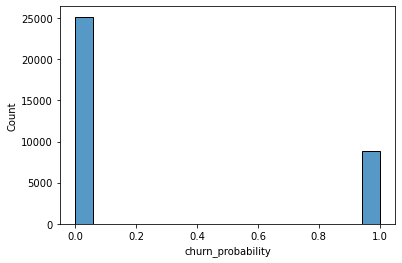

In [23]:
sns.histplot(y_train)

In [24]:
print('X Train set RES Shape: ', X_train_res.shape)
print('X Test set Shape: ', X_test.shape)
print('Y Train set RES Shape: ', y_train_res.shape)
print('Y Test set Shape: ', y_test.shape)

X Train set RES Shape:  (33958, 160)
X Test set Shape:  (21000, 160)
Y Train set RES Shape:  (33958,)
Y Test set Shape:  (21000,)


In [25]:
print('X Train set Shape: ', X_train.shape)
print('X Test set Shape: ', X_test.shape)
print('Y Train set Shape: ', y_train.shape)
print('Y Test set Shape: ', y_test.shape)

X Train set Shape:  (33958, 160)
X Test set Shape:  (21000, 160)
Y Train set Shape:  (33958,)
Y Test set Shape:  (21000,)


In [26]:
#this shows high imbalance in data set, where nearly 90% of customers are non-churn and only 10% are churn.
#we may use SMOTE or other techiques to overcome this.
train_data['churn_probability'].value_counts()/len(train_data)*100

0    89.811283
1    10.188717
Name: churn_probability, dtype: float64

In [27]:
y_test.head()

57621    0
39559    0
41415    0
47731    0
64801    0
Name: churn_probability, dtype: int64

In [28]:
#there are no missing values in train data set
X_train.isnull().sum()

arpu_6                 0
arpu_7                 0
arpu_8                 0
onnet_mou_6            0
onnet_mou_7            0
onnet_mou_8            0
offnet_mou_6           0
offnet_mou_7           0
offnet_mou_8           0
roam_ic_mou_6          0
roam_ic_mou_7          0
roam_ic_mou_8          0
roam_og_mou_6          0
roam_og_mou_7          0
roam_og_mou_8          0
loc_og_t2t_mou_6       0
loc_og_t2t_mou_7       0
loc_og_t2t_mou_8       0
loc_og_t2m_mou_6       0
loc_og_t2m_mou_7       0
loc_og_t2m_mou_8       0
loc_og_t2f_mou_6       0
loc_og_t2f_mou_7       0
loc_og_t2f_mou_8       0
loc_og_t2c_mou_6       0
loc_og_t2c_mou_7       0
loc_og_t2c_mou_8       0
loc_og_mou_6           0
loc_og_mou_7           0
loc_og_mou_8           0
std_og_t2t_mou_6       0
std_og_t2t_mou_7       0
std_og_t2t_mou_8       0
std_og_t2m_mou_6       0
std_og_t2m_mou_7       0
std_og_t2m_mou_8       0
std_og_t2f_mou_6       0
std_og_t2f_mou_7       0
std_og_t2f_mou_8       0
std_og_t2c_mou_6       0


In [29]:
#there are no missing values in test data set
X_test.isnull().sum()

arpu_6                 0
arpu_7                 0
arpu_8                 0
onnet_mou_6            0
onnet_mou_7            0
onnet_mou_8            0
offnet_mou_6           0
offnet_mou_7           0
offnet_mou_8           0
roam_ic_mou_6          0
roam_ic_mou_7          0
roam_ic_mou_8          0
roam_og_mou_6          0
roam_og_mou_7          0
roam_og_mou_8          0
loc_og_t2t_mou_6       0
loc_og_t2t_mou_7       0
loc_og_t2t_mou_8       0
loc_og_t2m_mou_6       0
loc_og_t2m_mou_7       0
loc_og_t2m_mou_8       0
loc_og_t2f_mou_6       0
loc_og_t2f_mou_7       0
loc_og_t2f_mou_8       0
loc_og_t2c_mou_6       0
loc_og_t2c_mou_7       0
loc_og_t2c_mou_8       0
loc_og_mou_6           0
loc_og_mou_7           0
loc_og_mou_8           0
std_og_t2t_mou_6       0
std_og_t2t_mou_7       0
std_og_t2t_mou_8       0
std_og_t2m_mou_6       0
std_og_t2m_mou_7       0
std_og_t2m_mou_8       0
std_og_t2f_mou_6       0
std_og_t2f_mou_7       0
std_og_t2f_mou_8       0
std_og_t2c_mou_6       0


In [30]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,0.000,123.476,102.074,0.00,19.19,29.68,0.00,70.54,64.28,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.51,15.38,0.00,18.24,62.09,0.00,0.00,1.78,0.00,0.00,0.00,0.00,18.76,79.26,0.00,18.68,14.29,0.00,52.13,0.40,0.0,0.00,0.0,0.0,0.0,0.0,0.00,70.81,14.69,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.0,0.0,0.00,89.74,93.96,5.09,3.15,0.00,26.11,38.83,35.28,2.66,0.20,0.00,33.88,42.18,35.28,15.16,43.66,7.31,4.26,1.98,2.30,0.00,0.00,0.00,0.0,0.0,0.0,19.43,45.64,9.61,53.48,88.68,44.89,0.00,0.23,0.0,0.00,0.11,0.00,0.16,0.50,0.00,3,7,6,0,180,90,0,30,30,12,30,27,0,30,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,762,0.0,0.0,0.0
1,145.614,168.417,102.195,64.26,19.39,23.84,42.44,28.53,50.26,0.0,0.0,0.0,0.0,0.0,0.0,35.79,19.39,23.84,22.69,28.53,32.68,0.28,0.00,0.00,0.55,0.00,1.01,58.78,47.93,56.53,28.46,0.00,0.00,17.44,0.00,15.54,0.0,0.00,0.0,0.0,0.0,0.0,45.91,0.00,15.54,0.00,0.00,0.00,2.01,0.00,3.46,0.51,0.0,0.0,107.23,47.93,75.54,28.98,12.78,11.94,137.24,186.36,186.04,3.38,0.00,3.33,169.61,199.14,201.33,10.11,38.41,84.31,26.36,0.00,0.38,0.45,1.61,0.88,0.0,0.0,0.0,36.93,40.03,85.58,207.91,239.86,287.94,0.30,0.00,0.0,0.00,0.00,0.00,1.06,0.68,1.03,7,9,8,149,225,101,50,67,50,29,30,31,14,67,17,3.0,5.0,3.0,25.0,25.0,17.0,3.0,5.0,3.0,0.0,0.0,0.0,64.0,117.0,51.0,32.7,98.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.24,0.0,0.0,0.0,0.0,0,0,0,3,5,3,0,0,0,0,0,0,1.0,1.0,0.0,345,0.0,0.0,0.0
2,111.937,105.671,143.076,28.19,38.41,25.69,110.43,78.13,126.51,0.0,0.0,0.0,0.0,0.0,0.0,28.19,38.41,25.69,94.41,65.03,115.03,16.01,12.06,11.31,0.00,0.00,0.16,138.63,115.51,152.04,0.00,0.00,0.0

<AxesSubplot:>

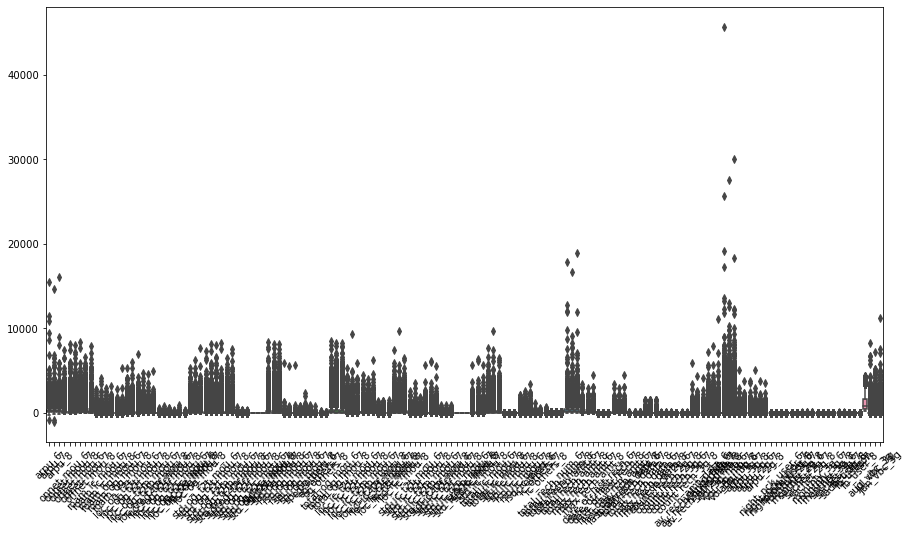

In [31]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X_train)

In [32]:
#taking care of outliers

def remove_outliers_data(dataframe):
    for col in dataframe.columns:
        #print("fixing outliers for ",col)
        if (((dataframe[col].dtype)=='float64') | ((dataframe[col].dtype)=='int64')):
            percentiles = dataframe[col].quantile([0.05,0.95]).values
            dataframe[col][dataframe[col] <= percentiles[0]] = percentiles[0]
            dataframe[col][dataframe[col] >= percentiles[1]] = percentiles[1]
        else:
            dataframe[col]=dataframe[col]
    return dataframe

X_train_outlier = remove_outliers_data(X_train)

In [33]:
X_test_outlier = remove_outliers_data(X_test)

<AxesSubplot:>

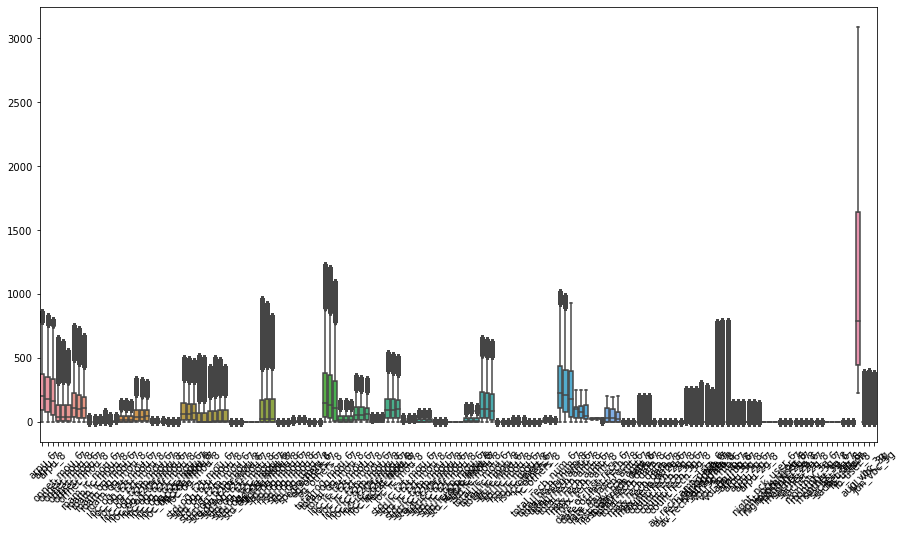

In [34]:
#after fixing outliers boxplot looks much better than before.
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X_train_outlier)

In [35]:
### Taking care of scaling for train data
scale = StandardScaler()
X_train_final = scale.fit_transform(X_train_outlier)

In [36]:
### Taking care of scaling for test data
scale = StandardScaler()
X_test_final = scale.fit_transform(X_test_outlier)

In [37]:
X_train_final

array([[-1.1498952 , -0.55040597, -0.56801944, ..., -0.33442055,
        -0.33528452, -0.33291434],
       [-0.52575896, -0.35146092, -0.56747502, ..., -0.33442055,
        -0.33528452, -0.33291434],
       [-0.67160902, -0.62922524, -0.38353531, ..., -0.33442055,
        -0.33528452, -0.33291434],
       ...,
       [ 0.98133645,  0.84586117,  1.2675851 , ..., -0.33442055,
        -0.33528452, -0.33291434],
       [ 1.67857495, -1.09492457, -1.02729052, ..., -0.33442055,
        -0.02815756,  3.67751402],
       [ 1.35239785,  2.10129923, -0.3472762 , ..., -0.33442055,
        -0.33528452, -0.33291434]])

In [38]:
X_test_final

array([[ 2.50763107,  2.50923824,  0.72111813, ..., -0.34978496,
        -0.34250927, -0.33416424],
       [ 1.14859257,  0.67839045,  0.74551365, ...,  0.56786158,
         3.61976614,  3.65746989],
       [ 1.7373616 ,  1.4809228 ,  1.59144254, ..., -0.34978496,
        -0.34250927, -0.33416424],
       ...,
       [-0.11807704,  0.63606648,  1.28429955, ..., -0.34978496,
        -0.34250927, -0.33416424],
       [ 1.3956622 ,  0.31908606,  1.80024549, ..., -0.34978496,
        -0.34250927, -0.33416424],
       [ 0.7429195 ,  1.63882946,  2.21972423, ..., -0.34978496,
        -0.34250927, -0.33416424]])

<AxesSubplot:>

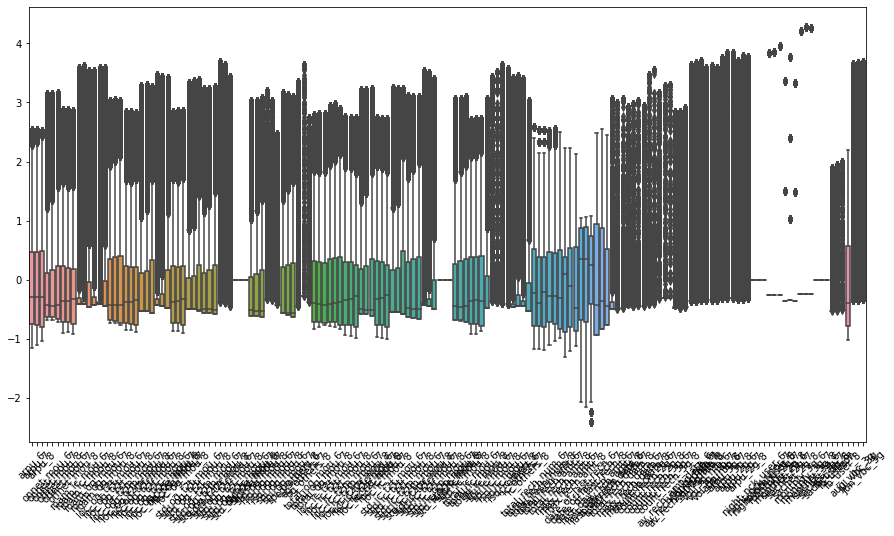

In [39]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = pd.DataFrame(X_train_final, columns=X_train_outlier.columns))

<AxesSubplot:>

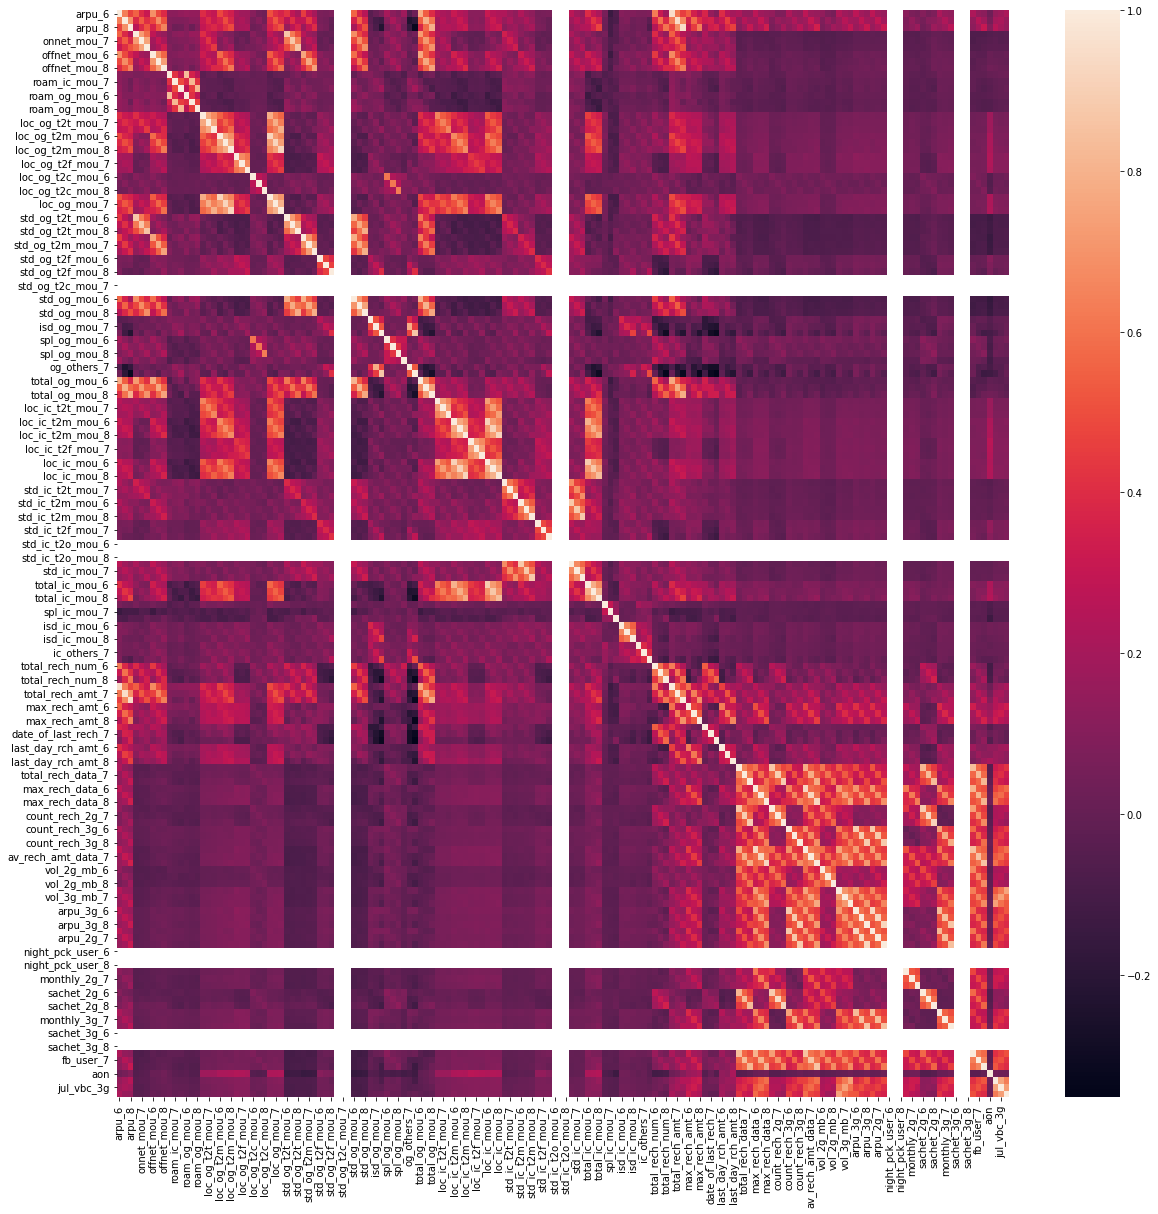

In [40]:
plt.figure(figsize=(20,20))
sns.heatmap(pd.DataFrame(X_train_final, columns=X_train_outlier.columns).corr())

<AxesSubplot:xlabel='churn_probability', ylabel='Count'>

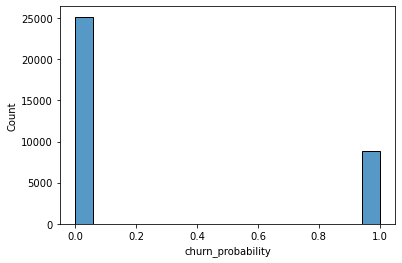

In [41]:
sns.histplot(y_train)

In [42]:
pca = PCA()
pca_analysis = pca.fit(X_train_final)


In [43]:
#sns.scatterplot(x=pca_analysis[:,0], y=pca_analysis[:,1], hue=y_train)

In [44]:
#sns.scatterplot(x=pca_analysis[:,1], y=pca_analysis[:,2], hue=y_train)

In [45]:
pca_analysis

PCA()

In [46]:
var_cumu = np.cumsum(pca_analysis.explained_variance_ratio_)
var_cumu

array([0.1540877 , 0.26423182, 0.33943835, 0.3905559 , 0.42997607,
       0.46179337, 0.48914803, 0.51469643, 0.5377844 , 0.55857804,
       0.57776549, 0.59578719, 0.61272254, 0.62875838, 0.64329812,
       0.65771991, 0.67089223, 0.68267497, 0.69421941, 0.70510536,
       0.71549893, 0.72572342, 0.7351882 , 0.74426675, 0.75303375,
       0.76061103, 0.76812528, 0.77541014, 0.78227079, 0.78891243,
       0.79547954, 0.8019413 , 0.80812612, 0.81414696, 0.81994071,
       0.82560421, 0.8311076 , 0.83653629, 0.84187384, 0.84710598,
       0.85212084, 0.85708035, 0.8617739 , 0.86620598, 0.87042902,
       0.87458947, 0.87862894, 0.88256207, 0.88639524, 0.89015116,
       0.89372883, 0.8971509 , 0.90048897, 0.90373748, 0.90692057,
       0.90999018, 0.9129997 , 0.91592805, 0.91881784, 0.92166233,
       0.92437588, 0.92690755, 0.92934415, 0.93176475, 0.93417904,
       0.93639009, 0.93854494, 0.94059381, 0.94256949, 0.94449527,
       0.94640485, 0.94830617, 0.95011115, 0.95187784, 0.95361

<BarContainer object of 160 artists>

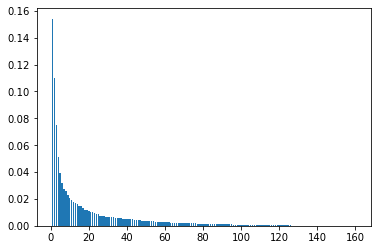

In [47]:
plt.bar(range(1,len(pca_analysis.explained_variance_ratio_)+1), pca_analysis.explained_variance_ratio_)

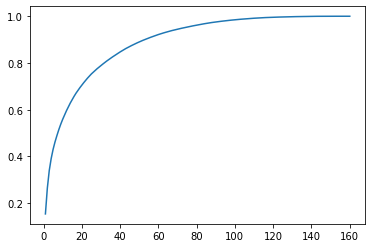

In [48]:
#Scree plot
plt.plot(range(1,len(var_cumu)+1), var_cumu)

### AdaBoostClassifer

In [49]:
X_train_final.shape

(33958, 160)

In [50]:
# PCA with 60 components
pca_60 = PCA(n_components=60)

df_tr_pca_60 = pca_60.fit_transform(X_train_final)
print(df_tr_pca_60.shape)

df_test_pca_60 = pca_60.transform(X_test_final)
print(df_test_pca_60.shape)

(33958, 60)
(21000, 60)


In [51]:
y_train.size

33958

In [52]:

#pca = PCA(n_components=60)
#rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf = AdaBoostClassifier(n_estimators=200, random_state=1)

#pipe = Pipeline(steps = [('pca',pca),
#                         ('model',rf)])

rf.fit(df_tr_pca_60, y_train)

y_pred_60 = rf.predict(df_test_pca_60)

#train_score = pipe.score(df_tr_pca_40, y_train)
#print("Training accuracy:", train_score)

#test_score = pipe.score(df_tr_pca_40, y_test)
#print("Test accuracy:", test_score)

print('Accuracy: ', accuracy_score(y_test, y_pred_60))

#train_confusion_matrix = confusion_matrix(y_train, pipe.predict(df_tr_pca_40))
#print('Train Confusion Matrix: ', train_confusion_matrix)

#test_confusion_matrix = confusion_matrix(y_test, pipe.predict(df_test_pca_40))
#print('Test Confusion Matrix: ', test_confusion_matrix)

print('Confusion Matrix: ', confusion_matrix(y_test,y_pred_60))

#precision_score = precision_score(y_test, y_pred_60, average='weighted')
print('Precision Score: ', precision_score(y_test, y_pred_60))

#recall_score = recall_score(y_test, y_pred_60, average='weighted')
print('Recall Score: ', recall_score(y_test, y_pred_60))

Accuracy:  0.8907619047619048
Confusion Matrix:  [[17034  1811]
 [  483  1672]]
Precision Score:  0.4800459374102785
Recall Score:  0.7758700696055685


In [53]:

#pca = PCA(n_components=75)
rf_1 = RandomForestClassifier(n_estimators=500, n_jobs=-1)

#pipe = Pipeline(steps = [('pca',pca),
                        # ('model',rf)])

rf_1.fit(df_tr_pca_60, y_train)

y_pred_60 = rf_1.predict(df_test_pca_60)

print('Accuracy: ', accuracy_score(y_test, y_pred_60))

cm = confusion_matrix(y_test,y_pred_60)
print('Confusion Matrix: ', cm)


print('Precision Score: ', precision_score(y_test, y_pred_60))

print('Recall Score: ', recall_score(y_test, y_pred_60))

Accuracy:  0.9292857142857143
Confusion Matrix:  [[18131   714]
 [  771  1384]]
Precision Score:  0.6596758817921831
Recall Score:  0.6422273781902552


In [54]:

#pca = PCA(n_components=75)
rf_2 = LogisticRegression(max_iter=1000, tol=0.001)

#pipe = Pipeline(steps = [('pca',pca),
#                         ('model',rf)])

rf_2.fit(df_tr_pca_60, y_train)

y_pred_60 = rf_2.predict(df_test_pca_60)

print('Accuracy: ', accuracy_score(y_test, y_pred_60))

print('Confusion Matrix: ', confusion_matrix(y_test,y_pred_60))

#precision_score = precision_score(y_test, y_pred_60)
print('Precision Score: ', precision_score(y_test, y_pred_60))

#recall_score = recall_score(y_test, y_pred_60)
print('Recall Score: ', recall_score(y_test, y_pred_60))

Accuracy:  0.8947142857142857
Confusion Matrix:  [[17111  1734]
 [  477  1678]]
Precision Score:  0.4917936694021102
Recall Score:  0.7786542923433875


In [55]:
#rfc=RandomForestClassifier(random_state=42)

#param_grid = {
#              'max_depth': [5, 10, None], 
#              'n_estimators': [100, 250, 500, 750]}

#CV_rfc = GridSearchCV(estimator=rfc, 
#                      param_grid=param_grid, 
#                      cv= 2, return_train_score=True, verbose=1)







In [56]:
#CV_rfc.fit(df_tr_pca_60, y_train)

In [57]:

#CV_rfc.best_params_



In [58]:
#y_pred_pca = CV_rfc.predict(df_test_pca_60)

In [59]:
#print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,y_pred_pca))

In [60]:
#print('Confusion Matrix: ', confusion_matrix(y_test,y_pred_pca))


#print('Precision Score: ', precision_score(y_test, y_pred_pca))

#print('Recall Score: ', recall_score(y_test, y_pred_pca))

In [61]:
rfc_best = RandomForestClassifier(n_estimators=750, n_jobs=-1)
rfc_best.fit(df_tr_pca_60, y_train)

RandomForestClassifier(n_estimators=750, n_jobs=-1)

In [62]:
y_pred_pca = rfc_best.predict(df_test_pca_60)

### Best Scores: Accuracy, Precision, Recall.

In [63]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,y_pred_pca))
print('Confusion Matrix: ', confusion_matrix(y_test,y_pred_pca))


print('Precision Score: ', precision_score(y_test, y_pred_pca))

print('Recall Score: ', recall_score(y_test, y_pred_pca))

Accuracy for Random Forest on CV data:  0.929047619047619
Confusion Matrix:  [[18132   713]
 [  777  1378]]
Precision Score:  0.6590148254423721
Recall Score:  0.6394431554524362


In [64]:
test_data.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,21,26,24,30,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1692,0.00,0.00,0.00
1,70000,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,19,16,24,250,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2533,0.00,0.00,0.00
2,70001,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.

In [65]:
test_data.shape

(30000, 161)

In [66]:
test_data['onnet_mou_6'].fillna(value=test_data['onnet_mou_6'].mean(), inplace=True)
test_data['onnet_mou_7'].fillna(value=test_data['onnet_mou_7'].mean(), inplace=True)
test_data['onnet_mou_8'].fillna(value=test_data['onnet_mou_8'].mean(), inplace=True)
test_data['offnet_mou_6'].fillna(value=test_data['offnet_mou_6'].mean(), inplace=True)
test_data['offnet_mou_7'].fillna(value=test_data['offnet_mou_7'].mean(), inplace=True)
test_data['offnet_mou_8'].fillna(value=test_data['offnet_mou_8'].mean(), inplace=True)
test_data['roam_ic_mou_6'].fillna(value=test_data['roam_ic_mou_6'].mean(), inplace=True)
test_data['roam_ic_mou_7'].fillna(value=test_data['roam_ic_mou_7'].mean(), inplace=True)

test_data['roam_ic_mou_8'].fillna(value=test_data['roam_ic_mou_8'].mean(), inplace=True)
test_data['roam_og_mou_6'].fillna(value=test_data['roam_og_mou_6'].mean(), inplace=True)
test_data['roam_og_mou_7'].fillna(value=test_data['roam_og_mou_7'].mean(), inplace=True)
test_data['roam_og_mou_8'].fillna(value=test_data['roam_og_mou_8'].mean(), inplace=True)
test_data['loc_og_t2t_mou_6'].fillna(value=test_data['loc_og_t2t_mou_6'].mean(), inplace=True)
test_data['loc_og_t2t_mou_7'].fillna(value=test_data['loc_og_t2t_mou_7'].mean(), inplace=True)
test_data['loc_og_t2t_mou_8'].fillna(value=test_data['loc_og_t2t_mou_8'].mean(), inplace=True)
test_data['loc_og_t2m_mou_6'].fillna(value=test_data['loc_og_t2m_mou_6'].mean(), inplace=True)
test_data['loc_og_t2m_mou_7'].fillna(value=test_data['loc_og_t2m_mou_7'].mean(), inplace=True)
test_data['loc_og_t2m_mou_8'].fillna(value=test_data['loc_og_t2m_mou_8'].mean(), inplace=True)

test_data['loc_og_t2f_mou_6'].fillna(value=test_data['loc_og_t2f_mou_6'].mean(), inplace=True)
test_data['loc_og_t2f_mou_7'].fillna(value=test_data['loc_og_t2f_mou_7'].mean(), inplace=True)
test_data['loc_og_t2f_mou_8'].fillna(value=test_data['loc_og_t2f_mou_8'].mean(), inplace=True)
test_data['loc_og_t2c_mou_6'].fillna(value=test_data['loc_og_t2c_mou_6'].mean(), inplace=True)
test_data['loc_og_t2c_mou_7'].fillna(value=test_data['loc_og_t2c_mou_7'].mean(), inplace=True)
test_data['loc_og_t2c_mou_8'].fillna(value=test_data['loc_og_t2c_mou_8'].mean(), inplace=True)
test_data['loc_og_mou_6'].fillna(value=test_data['loc_og_mou_6'].mean(), inplace=True)
test_data['loc_og_mou_7'].fillna(value=test_data['loc_og_mou_7'].mean(), inplace=True)
test_data['loc_og_mou_8'].fillna(value=test_data['loc_og_mou_8'].mean(), inplace=True)
test_data['std_og_t2t_mou_6'].fillna(value=test_data['std_og_t2t_mou_6'].mean(), inplace=True)
test_data['std_og_t2t_mou_7'].fillna(value=test_data['std_og_t2t_mou_7'].mean(), inplace=True)
test_data['std_og_t2t_mou_8'].fillna(value=test_data['std_og_t2t_mou_8'].mean(), inplace=True)
test_data['std_og_t2m_mou_6'].fillna(value=test_data['std_og_t2m_mou_6'].mean(), inplace=True)
test_data['std_og_t2m_mou_7'].fillna(value=test_data['std_og_t2m_mou_7'].mean(), inplace=True)

test_data['std_og_t2m_mou_8'].fillna(value=test_data['std_og_t2m_mou_8'].mean(), inplace=True)
test_data['std_og_t2f_mou_6'].fillna(value=test_data['std_og_t2f_mou_6'].mean(), inplace=True)
test_data['std_og_t2f_mou_7'].fillna(value=test_data['std_og_t2f_mou_7'].mean(), inplace=True)
test_data['std_og_t2f_mou_8'].fillna(value=test_data['std_og_t2f_mou_8'].mean(), inplace=True)
test_data['std_og_t2c_mou_6'].fillna(value=test_data['std_og_t2c_mou_6'].mean(), inplace=True)
test_data['std_og_t2c_mou_7'].fillna(value=test_data['std_og_t2c_mou_7'].mean(), inplace=True)
test_data['std_og_t2c_mou_8'].fillna(value=test_data['std_og_t2c_mou_8'].mean(), inplace=True)
test_data['std_og_mou_6'].fillna(value=test_data['std_og_mou_6'].mean(), inplace=True)
test_data['std_og_mou_7'].fillna(value=test_data['std_og_mou_7'].mean(), inplace=True)
test_data['std_og_mou_8'].fillna(value=test_data['std_og_mou_8'].mean(), inplace=True)
test_data['isd_og_mou_6'].fillna(value=test_data['isd_og_mou_6'].mean(), inplace=True)
test_data['isd_og_mou_7'].fillna(value=test_data['isd_og_mou_7'].mean(), inplace=True)
test_data['isd_og_mou_8'].fillna(value=test_data['isd_og_mou_8'].mean(), inplace=True)
test_data['spl_og_mou_6'].fillna(value=test_data['spl_og_mou_6'].mean(), inplace=True)
test_data['spl_og_mou_7'].fillna(value=test_data['spl_og_mou_7'].mean(), inplace=True)
test_data['spl_og_mou_8'].fillna(value=test_data['spl_og_mou_8'].mean(), inplace=True)

test_data['og_others_6'].fillna(value=test_data['og_others_6'].mean(), inplace=True)
test_data['og_others_7'].fillna(value=test_data['og_others_7'].mean(), inplace=True)
test_data['og_others_8'].fillna(value=test_data['og_others_8'].mean(), inplace=True)
test_data['loc_ic_t2t_mou_6'].fillna(value=test_data['loc_ic_t2t_mou_6'].mean(), inplace=True)
test_data['loc_ic_t2t_mou_7'].fillna(value=test_data['loc_ic_t2t_mou_7'].mean(), inplace=True)
test_data['loc_ic_t2t_mou_8'].fillna(value=test_data['loc_ic_t2t_mou_8'].mean(), inplace=True)

test_data['loc_ic_t2m_mou_6'].fillna(value=test_data['loc_ic_t2m_mou_6'].mean(), inplace=True)
test_data['loc_ic_t2m_mou_7'].fillna(value=test_data['loc_ic_t2m_mou_7'].mean(), inplace=True)
test_data['loc_ic_t2m_mou_8'].fillna(value=test_data['loc_ic_t2m_mou_8'].mean(), inplace=True)

test_data['loc_ic_t2f_mou_6'].fillna(value=test_data['loc_ic_t2f_mou_6'].mean(), inplace=True)
test_data['loc_ic_t2f_mou_7'].fillna(value=test_data['loc_ic_t2f_mou_7'].mean(), inplace=True)
test_data['loc_ic_t2f_mou_8'].fillna(value=test_data['loc_ic_t2f_mou_8'].mean(), inplace=True)
test_data['loc_ic_mou_6'].fillna(value=test_data['loc_ic_mou_6'].mean(), inplace=True)
test_data['loc_ic_mou_7'].fillna(value=test_data['loc_ic_mou_7'].mean(), inplace=True)
test_data['loc_ic_mou_8'].fillna(value=test_data['loc_ic_mou_8'].mean(), inplace=True)
test_data['std_ic_t2t_mou_6'].fillna(value=test_data['std_ic_t2t_mou_6'].mean(), inplace=True)
test_data['std_ic_t2t_mou_7'].fillna(value=test_data['std_ic_t2t_mou_7'].mean(), inplace=True)
test_data['std_ic_t2t_mou_8'].fillna(value=test_data['std_ic_t2t_mou_8'].mean(), inplace=True)
test_data['std_ic_t2m_mou_6'].fillna(value=test_data['std_ic_t2m_mou_6'].mean(), inplace=True)
test_data['std_ic_t2m_mou_7'].fillna(value=test_data['std_ic_t2m_mou_7'].mean(), inplace=True)
test_data['std_ic_t2m_mou_8'].fillna(value=test_data['std_ic_t2m_mou_8'].mean(), inplace=True)
test_data['std_ic_t2f_mou_6'].fillna(value=test_data['std_ic_t2f_mou_6'].mean(), inplace=True)
test_data['std_ic_t2f_mou_7'].fillna(value=test_data['std_ic_t2f_mou_7'].mean(), inplace=True)
test_data['std_ic_t2f_mou_8'].fillna(value=test_data['std_ic_t2f_mou_8'].mean(), inplace=True)
test_data['std_ic_t2o_mou_6'].fillna(value=test_data['std_ic_t2o_mou_6'].mean(), inplace=True)
test_data['std_ic_t2o_mou_7'].fillna(value=test_data['std_ic_t2o_mou_7'].mean(), inplace=True)
test_data['std_ic_t2o_mou_8'].fillna(value=test_data['std_ic_t2o_mou_8'].mean(), inplace=True)
test_data['std_ic_mou_6'].fillna(value=test_data['std_ic_mou_6'].mean(), inplace=True)
test_data['std_ic_mou_7'].fillna(value=test_data['std_ic_mou_7'].mean(), inplace=True)
test_data['std_ic_mou_8'].fillna(value=test_data['std_ic_mou_8'].mean(), inplace=True)
test_data['spl_ic_mou_6'].fillna(value=test_data['spl_ic_mou_6'].mean(), inplace=True)
test_data['spl_ic_mou_7'].fillna(value=test_data['spl_ic_mou_7'].mean(), inplace=True)
test_data['spl_ic_mou_8'].fillna(value=test_data['spl_ic_mou_8'].mean(), inplace=True)
test_data['isd_ic_mou_6'].fillna(value=test_data['isd_ic_mou_6'].mean(), inplace=True)
test_data['isd_ic_mou_7'].fillna(value=test_data['isd_ic_mou_7'].mean(), inplace=True)
test_data['isd_ic_mou_8'].fillna(value=test_data['isd_ic_mou_8'].mean(), inplace=True)
test_data['ic_others_6'].fillna(value=test_data['ic_others_6'].mean(), inplace=True)
test_data['ic_others_7'].fillna(value=test_data['ic_others_7'].mean(), inplace=True)
test_data['ic_others_8'].fillna(value=test_data['ic_others_8'].mean(), inplace=True)

In [67]:
test_data.isnull().sum()

id                     0
arpu_6                 0
arpu_7                 0
arpu_8                 0
onnet_mou_6            0
onnet_mou_7            0
onnet_mou_8            0
offnet_mou_6           0
offnet_mou_7           0
offnet_mou_8           0
roam_ic_mou_6          0
roam_ic_mou_7          0
roam_ic_mou_8          0
roam_og_mou_6          0
roam_og_mou_7          0
roam_og_mou_8          0
loc_og_t2t_mou_6       0
loc_og_t2t_mou_7       0
loc_og_t2t_mou_8       0
loc_og_t2m_mou_6       0
loc_og_t2m_mou_7       0
loc_og_t2m_mou_8       0
loc_og_t2f_mou_6       0
loc_og_t2f_mou_7       0
loc_og_t2f_mou_8       0
loc_og_t2c_mou_6       0
loc_og_t2c_mou_7       0
loc_og_t2c_mou_8       0
loc_og_mou_6           0
loc_og_mou_7           0
loc_og_mou_8           0
std_og_t2t_mou_6       0
std_og_t2t_mou_7       0
std_og_t2t_mou_8       0
std_og_t2m_mou_6       0
std_og_t2m_mou_7       0
std_og_t2m_mou_8       0
std_og_t2f_mou_6       0
std_og_t2f_mou_7       0
std_og_t2f_mou_8       0


In [68]:
### Taking care of scaling for train data
scale = StandardScaler()
X_test_unseen = scale.fit_transform(test_data)

In [69]:
X_test_unseen

array([[-1.73199307, -0.60645155, -0.66220616, ..., -0.25929959,
        -0.24734668, -0.24336869],
       [-1.7318776 ,  0.41812613,  0.73085703, ..., -0.25929959,
        -0.24734668, -0.24336869],
       [-1.73176213,  0.15005216,  0.48121593, ...,  1.73575652,
         2.47345839,  0.73934447],
       ...,
       [ 1.73176213, -0.45515526, -0.74605518, ..., -0.25929959,
        -0.24734668, -0.24336869],
       [ 1.7318776 ,  2.67129035,  1.55249383, ..., -0.25929959,
        -0.24734668, -0.24336869],
       [ 1.73199307,  0.11551447,  0.08828892, ...,  2.63510887,
         2.21774053, -0.15088378]])

In [70]:
pca = PCA(n_components=60)
pca.fit_transform(X_test_unseen)

array([[-3.78518368e+00, -1.04620196e+00,  1.00486320e-01, ...,
        -1.75855758e-03, -2.27553675e-02,  1.52047622e-01],
       [ 8.11702360e-01,  2.70762399e+00, -2.83415837e+00, ...,
         1.27035650e-01,  4.91318451e-01, -1.45818275e-01],
       [-7.59101101e-01, -7.43767917e-01,  7.62330719e-01, ...,
         5.21676856e-01, -1.06330085e-01,  9.21336986e-02],
       ...,
       [-3.82028460e+00, -1.26409122e+00,  3.42655848e-01, ...,
        -1.44288990e-02,  1.64259708e-01, -2.43293043e-01],
       [ 1.94692378e+00,  6.35046317e+00,  6.17857612e+00, ...,
        -1.56962991e-01, -1.96877552e-01,  1.66418951e-01],
       [ 1.14319887e+01, -9.76160508e+00,  2.48036228e+00, ...,
        -1.00457227e+00, -2.24199142e+00,  5.67108339e-02]])

In [71]:
pipe = Pipeline(steps = [('pca',pca),
                         ('model',rfc_best)])

In [72]:
test_data['churn_probability'] = pipe.predict(X_test_unseen)

In [73]:
test_data.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,69999,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,21,26,24,30,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1692,0.00,0.00,0.00,0
1,70000,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,19,16,24,250,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2533,0.00,0.00,0.00,0
2,70001,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,

In [74]:
test_output = test_data[['id', 'churn_probability']]

In [75]:
test_output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [76]:
test_output.to_csv('balakumar_roshan_output.csv', index=False)

In [79]:
#test_output['churn_probability'].value_counts()/len(test_data)*100